In [23]:
import numpy as np
from models.linear import LinearRegression
from models.logistic import LogisticRegression
from metrics.classification_metrics import *

In [24]:
from sklearn import datasets

iris = datasets.load_iris()

X = iris.data
Y = iris.target

In [25]:
#n_samples = 500
#np.random.seed(42)

#classes = ["A", "B", "C", "D"]

#random_classes = np.random.choice(classes, size=n_samples)


#class_to_int = {label: idx for idx, label in enumerate(classes)}
#random_classes_int = np.vectorize(class_to_int.get)(random_classes)

In [26]:
#X = np.random.normal(2, 2, n_samples)
#Z = np.random.normal(9, 1, n_samples) 
#P = np.random.beta(1, 2, n_samples)

#Y = 2*X +  np.random.normal(0, 0.5, n_samples) + P + Z + random_classes_int * X 

#X= np.column_stack((X,X**2, Z + X, X * P, P, random_classes_int))

In [27]:
reg = LinearRegression(regularization="None").fit(X,Y)
ridge = LinearRegression(regularization="Ridge").fit(X,Y)
lasso = LinearRegression(regularization="Lasso", n_iter = 10000, lr=0.001).fit(X,Y)
elastic = LinearRegression(regularization="ElasticNet", n_iter = 10000, lr=0.001, alpha=0.4).fit(X,Y)

Converged at iteration 13, Δloss = 0.000086
Converged at iteration 12, Δloss = 0.000037


In [28]:
elastic_pred = elastic.predict(X)
elastic.print_errors(Y, elastic_pred), lasso.print_errors(Y, lasso.predict(X)), ridge.print_errors(Y, ridge.predict(X))
elastic.score(X, Y), lasso.score(X, Y), ridge.score(X, Y)

╒══════════╤═════════╕
│ Metric   │   Value │
╞══════════╪═════════╡
│ MAE      │  0.335  │
├──────────┼─────────┤
│ RMSE     │  0.3713 │
├──────────┼─────────┤
│ MSE      │  0.1378 │
╘══════════╧═════════╛
╒══════════╤═════════╕
│ Metric   │   Value │
╞══════════╪═════════╡
│ MAE      │   0.201 │
├──────────┼─────────┤
│ RMSE     │   0.249 │
├──────────┼─────────┤
│ MSE      │   0.062 │
╘══════════╧═════════╛
╒══════════╤═════════╕
│ Metric   │   Value │
╞══════════╪═════════╡
│ MAE      │  0.1652 │
├──────────┼─────────┤
│ RMSE     │  0.2155 │
├──────────┼─────────┤
│ MSE      │  0.0464 │
╘══════════╧═════════╛


(np.float64(0.7932356265087651),
 np.float64(0.9070035948123093),
 np.float64(0.9303484478324595))

In [29]:
reg.do_all(X, Y)

Model score:0.9303939218549563
R adjusted:0.906069897754173
Beta: [ 0.18649525 -0.11190585 -0.04007949  0.22864503  0.60925205]
Cross validation score: {'MAE': 0.1706, 'RMSE': 0.2201, 'MSE': 0.0489, 'R2': 0.924}
        The Ramsey RESET test for linearity
        Test Statistic : 21.3944 
        P-value        : 0.0 
        Interpretation : Model may be misspecified (nonlinearity exists) ❌ 
        
        Breusch-Pagan Test for Heteroscedasticity
        Test Statistic : 32.3809
        P-value        : 0.0
        Interpretation : Heteroscedasticity detected — variance of residuals is not constant. ❌
        
        Durbin-Watson Test for Independence of Errors
        DW Statistic  : 1.0767
        Interpretation: Possible positive autocorrelation ❌ 
        
        VIF Test for Multicollinearity
        Feature 1: VIF = 7.072722013939539 | Multicollinearity ❌
        Feature 2: VIF = 2.100871676124254 | No Multicollinearity ✅
        Feature 3: VIF = 31.26149777492164 | Multic

In [30]:
reg.Cooks_distance(X,Y)

array([7.87187450e-04, 2.29645347e-04, 2.68422712e-04, 1.92947423e-05,
       7.26535645e-04, 6.19417900e-04, 2.10323282e-04, 2.06176155e-04,
       6.41381761e-05, 8.41947608e-04, 1.63271521e-03, 8.05991834e-08,
       1.07920432e-03, 1.80193118e-03, 1.93374830e-02, 7.02795700e-04,
       2.81392339e-04, 5.73183908e-05, 2.13786604e-04, 1.92066328e-05,
       2.54745230e-04, 4.27117929e-04, 2.56091470e-03, 3.73359977e-03,
       1.14319246e-03, 3.97697686e-06, 1.02111783e-03, 5.92175675e-04,
       1.04229000e-03, 5.10224146e-05, 1.79561621e-05, 2.22972687e-04,
       8.76278451e-03, 7.58813470e-03, 4.96724891e-05, 1.81407963e-03,
       5.39134187e-03, 2.59246738e-03, 7.64680858e-06, 3.29861506e-04,
       1.45449586e-04, 2.45173628e-03, 3.63587932e-05, 8.34823588e-03,
       4.12251420e-03, 1.50972241e-04, 4.85811034e-04, 2.63365136e-05,
       1.20633065e-03, 4.32373981e-04, 8.37998537e-03, 4.80632057e-03,
       1.56820233e-02, 5.90939340e-03, 1.09370604e-02, 1.06350355e-02,
      

In [31]:
#classes = ["A", "B", "C"]
#n_samples = 150

#random_classes = np.random.choice(classes, size=n_samples)


#class_to_int = {label: idx for idx, label in enumerate(classes)}
#random_classes_int = np.vectorize(class_to_int.get)(random_classes)

#X = np.random.normal(2, 2, n_samples)
#Z = np.random.normal(9, 1, n_samples) 
#P = np.random.beta(1, 2, n_samples)


#X= np.column_stack((Z, X))

#Y = random_classes_int

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [32]:
import pandas as pd

#X = pd.DataFrame(X, columns=["1","2","3","4","5"])

In [33]:

log = LogisticRegression(X.shape[1], 
                         len(np.unique(Y)), 
                         regularization="elastic_net", 
                         solver="LBFGS",
                         l2_ratio=0.5,
                         l1_ratio= 0.9,
                         lr=0.2, 
                         n_iter = 100,
                         random_state = 0)
log.fit(X, Y)

0.64


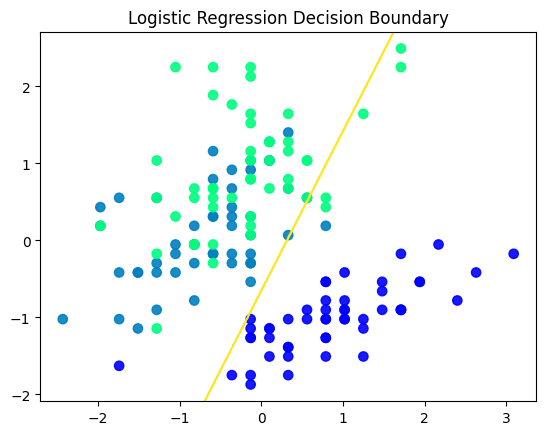

In [34]:
pred = log.predict(X)
pred
print(balanced_accuracy(Y, pred))
log.plot(1,0)

In [35]:
log.theta

array([-0.12622487, -0.03790759, -0.07295279, -0.11803049, -0.06759471,
       -0.12063132, -0.01647661, -0.06902052,  0.04075236, -0.13995021,
        0.15249024, -0.07565421, -0.12189212,  0.09991634, -0.02225832])

In [36]:
from models.onevsall import OVA
from models.svm import SVMClassificator
for i in range(0, 18):
    ova = OVA(SVMClassificator(kernel="rbf", n_iter=i, lr=0.01 , C=i, r=1, degree=2 )).fit(X,Y)

    print(balanced_accuracy(Y, ova.predict(X)), i)

0.3333333333333333 0
0.94 1
0.3333333333333333 2
0.96 3
0.6066666666666666 4
0.96 5
0.8133333333333334 6
0.96 7
0.8533333333333334 8
0.9533333333333333 9
0.8866666666666667 10
0.9533333333333333 11
0.9066666666666666 12
0.9466666666666667 13
0.9 14
0.9533333333333333 15
0.8666666666666667 16
0.94 17


Svm model should be used with two classes, use One vs All approach for multicalss problems.
0.6666666666666666


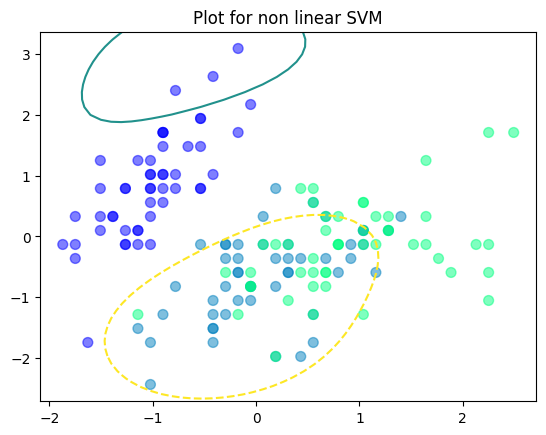

In [37]:
svm = SVMClassificator(kernel="rbf", n_iter=100, lr=0.01 , C=1, r=1, gamma=0.4).fit(X,Y)
svm.predict(X)
print(balanced_accuracy(Y, svm.predict(X)))
svm.plot(0,1)

In [38]:
from models.decision_trees import DecisionTreeClassifier
from models.onevsone import OVO

tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X, Y)

print(balanced_accuracy(Y, tree.predict(X)))
print(confusion_matrix(Y, tree.predict(X)))

0.98
[[50.  0.  0.]
 [ 0. 49.  1.]
 [ 0.  2. 48.]]


In [39]:
from models.decision_trees import DecisionTreeRegressor
from metrics.regression_metrics import *

tree = DecisionTreeRegressor(max_depth = 5)
tree.fit(X, Y)


print(MSE(Y, tree.predict(X)))
print(MAE(Y, tree.predict(X)))
print(RMSE(Y, tree.predict(X)))


0.012222222222222223
0.024444444444444446
0.11055415967851333


In [40]:
from models.votingclassifier import VotingClassifier

votes = VotingClassifier(
    estimators = [
        DecisionTreeClassifier(max_depth = 5),
        LogisticRegression(X.shape[1], 
                         len(np.unique(Y)), 
                         regularization="elastic_net", 
                         solver="ADABelief",
                         l2_ratio=0.5,
                         l1_ratio= 0.9,
                         lr=1, 
                         n_iter = 1000,
                         random_state = 0),
        LogisticRegression(X.shape[1], 
                         len(np.unique(Y)), 
                         regularization="l1", 
                         solver="ADABelief",
                         #l2_ratio=0.5,
                         l1_ratio= 0.09,
                         lr=1, 
                         n_iter = 1000,
                         random_state = 2),
        LogisticRegression(X.shape[1], 
                         len(np.unique(Y)), 
                         #regularization="elastic_net", 
                         solver="ADABelief",
                         #l2_ratio=0.5,
                         #l1_ratio= 0.9,
                         lr=0.01, 
                         n_iter = 1000,
                         random_state = 2)
        ],
        soft_votting = False 
)

votes.fit(X, Y)
preds = votes.predict(X)
print(balanced_accuracy(Y, preds))
print(confusion_matrix(Y, preds))

Converged at iteration 252, Δloss = 0.000024
Converged at iteration 972, Δloss = 0.000093
Converged at iteration 536, Δloss = 0.000100
0.9666666666666667
[[50.  0.  0.]
 [ 0. 49.  1.]
 [ 0.  4. 46.]]


In [41]:
from models.bagging import BaggingClassifier

bagging = BaggingClassifier(
    LogisticRegression, 
    n_splits = 2,
    soft_voting = True,
    #max_depth = 5,
    replacement=False,
    n_features=X.shape[1], 
    n_classes=len(np.unique(Y)),
    solver="ADABelief"

)

bagging.fit(X, Y)
preds = bagging.predict(X)
print(balanced_accuracy(Y, preds))
print(confusion_matrix(Y, preds))


0.96
[[50.  0.  0.]
 [ 0. 47.  3.]
 [ 0.  3. 47.]]
